In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNNClassifier

In [9]:
from sklearn.linear_model import SGDClassifier as LinearRegression

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
dataframe = pd.read_csv('CreditDataset.csv', nrows=20000)
dataframe

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,b86ac9e3-bf85-42df-aaae-eae58d84fdee,a7cab8da-8df9-4b47-9711-0c69e763cad2,Fully Paid,89100,Short Term,703.0,1077414.0,8 years,Rent,Medical Bills,15173.59,19.9,27.0,10,0,272688,362912,0.0,0.0
19996,899c9abd-a5eb-4a20-b62c-dc6399a7206c,425012ea-084c-4cab-96b3-e9057d55ad76,Charged Off,676368,Long Term,6240.0,1460340.0,10+ years,Own Home,Business Loan,6097.10,36.0,NaN,2,0,317243,585860,0.0,0.0
19997,52e0b873-6394-46e0-9943-54621e1939c6,d7b21e67-904b-458e-bcb7-63b7db2bd4fe,Fully Paid,550418,Long Term,675.0,1134072.0,3 years,Home Mortgage,Debt Consolidation,13325.27,29.4,26.0,5,0,77634,102850,0.0,0.0
19998,97ffbb23-b223-4771-a6e2-c86db23a0147,b2a2532e-1419-4bb3-8634-d2a4d31ef323,Fully Paid,91124,Short Term,709.0,1349266.0,2 years,Rent,Debt Consolidation,26422.92,11.0,74.0,14,0,69787,340956,0.0,0.0


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       20000 non-null  object 
 1   Customer ID                   20000 non-null  object 
 2   Loan Status                   20000 non-null  object 
 3   Current Loan Amount           20000 non-null  int64  
 4   Term                          20000 non-null  object 
 5   Credit Score                  16140 non-null  float64
 6   Annual Income                 16140 non-null  float64
 7   Years in current job          19136 non-null  object 
 8   Home Ownership                20000 non-null  object 
 9   Purpose                       20000 non-null  object 
 10  Monthly Debt                  20000 non-null  float64
 11  Years of Credit History       20000 non-null  float64
 12  Months since last delinquent  9272 non-null   float64
 13  N

In [15]:
dataframe[list(dataframe.columns)].isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                     3860
Annual Income                    3860
Years in current job              864
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    10728
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                       44
Tax Liens                           3
dtype: int64

In [16]:
print(dataframe['Tax Liens'].value_counts())
print(dataframe['Tax Liens'].unique())
print(dataframe['Tax Liens'].isnull().sum())

0.0    19612
1.0      280
2.0       70
3.0       20
4.0        8
6.0        4
5.0        3
Name: Tax Liens, dtype: int64
[ 0.  1.  2.  4.  3.  6.  5. nan]
3


In [17]:
dataframe['Tax Liens'] = dataframe['Tax Liens'].fillna(0)

In [18]:
print(dataframe['Bankruptcies'].value_counts())
print(dataframe['Bankruptcies'].unique())
print(dataframe['Bankruptcies'].isnull().sum())

0.0    17696
1.0     2148
2.0       89
3.0       15
4.0        5
5.0        3
Name: Bankruptcies, dtype: int64
[ 1.  0.  2.  3. nan  5.  4.]
44


In [19]:
dataframe['Bankruptcies'] = dataframe['Bankruptcies'].fillna(0)

In [20]:
dataframe[dataframe['Years in current job'].isnull()]['Annual Income'].isnull().sum()

166

In [21]:
dataframe.loc[dataframe['Annual Income'].isnull(), 'Years in current job'] = 'None'


In [22]:
dataframe.loc[dataframe['Years in current job'].isnull(),'Years in current job'] = 'casual job'

In [23]:
dataframe.loc[dataframe['Months since last delinquent'].isnull(),'Months since last delinquent'] = 240
dataframe['Months since last delinquent'] = dataframe['Months since last delinquent'] - 240

In [24]:
NaNcount_AnnualIncome = []
NaNcount_CreditScore = []
NaNcount = []
for i in range(len(dataframe)):
    if np.isnan(dataframe['Annual Income'][i]) == True:
        NaNcount_AnnualIncome += [i]

for i in range(len(dataframe)):
    if np.isnan(dataframe['Credit Score'][i]) == True:
        NaNcount_CreditScore += [i]
        
    
for i in range(len(NaNcount_AnnualIncome)):
    if NaNcount_AnnualIncome[i] == NaNcount_CreditScore[i]:
        NaNcount += [i]

        
print('NaN count_AnnualIncome :',len(NaNcount_AnnualIncome))
print('NaN count_CreditScore : ',len(NaNcount_CreditScore))
print('NaN count :',len(NaNcount))

NaN count_AnnualIncome : 3860
NaN count_CreditScore :  3860
NaN count : 3860


In [25]:
dataframe.loc[dataframe['Credit Score'].isnull(),'Credit Score'] = 0
dataframe.loc[dataframe['Annual Income'].isnull(),'Annual Income'] = 0

In [26]:
dataframe[list(dataframe.columns)].isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [27]:
dataframe['Maximum Open Credit'].describe().astype('int')

count        20000
mean        781690
std        6700117
min              0
25%         272481
50%         466400
75%         787754
max      632477736
Name: Maximum Open Credit, dtype: int32

In [28]:
dataframe = dataframe.dropna()
print(dataframe.isnull().sum())
print(len(dataframe))

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64
20000


D:\WisenProgramFiles\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

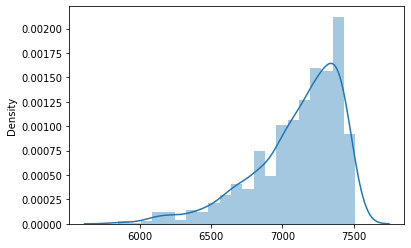

In [29]:
sns.distplot(dataframe.loc[dataframe['Credit Score']>850, ['Credit Score']])

In [30]:
dataframe.loc[dataframe['Credit Score']>850, ['Credit Score']] = (dataframe.loc[dataframe['Credit Score']>850, ['Credit Score']])/10

D:\WisenProgramFiles\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Current Loan Amount', ylabel='Density'>

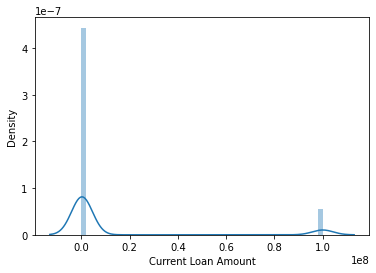

In [31]:
sns.distplot(np.around(dataframe['Current Loan Amount'], 1))

In [32]:
temp = dataframe.loc[dataframe['Current Loan Amount']==99999999, ['Current Loan Amount', 'Term', 'Purpose', 'Loan Status']]
print(temp['Purpose'].value_counts())
print('-'*20)
print(temp['Loan Status'].value_counts())
print('-'*20)
print(temp['Term'].value_counts())

Debt Consolidation      1766
Home Improvements        133
other                    118
Other                     79
Buy a Car                 38
Medical Bills             33
Business Loan             21
Take a Trip               20
Buy House                 12
major_purchase             9
Educational Expenses       7
small_business             5
moving                     4
wedding                    2
Name: Purpose, dtype: int64
--------------------
Fully Paid    2247
Name: Loan Status, dtype: int64
--------------------
Short Term    1773
Long Term      474
Name: Term, dtype: int64


In [33]:
dataframe = dataframe.loc[dataframe['Current Loan Amount']!=99999999]
dataframe

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6,1,228190,416746,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,0.0,0.0,None,Home Mortgage,Debt Consolidation,33295.98,21.1,-232.0,35,0,229976,850784,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9,0,256329,386958,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,0.0,0.0,None,Rent,Debt Consolidation,20639.70,6.1,0.0,15,0,253460,427174,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,729.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,0.0,6,0,215308,272448,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,b86ac9e3-bf85-42df-aaae-eae58d84fdee,a7cab8da-8df9-4b47-9711-0c69e763cad2,Fully Paid,89100,Short Term,703.0,1077414.0,8 years,Rent,Medical Bills,15173.59,19.9,-213.0,10,0,272688,362912,0.0,0.0
19996,899c9abd-a5eb-4a20-b62c-dc6399a7206c,425012ea-084c-4cab-96b3-e9057d55ad76,Charged Off,676368,Long Term,624.0,1460340.0,10+ years,Own Home,Business Loan,6097.10,36.0,0.0,2,0,317243,585860,0.0,0.0
19997,52e0b873-6394-46e0-9943-54621e1939c6,d7b21e67-904b-458e-bcb7-63b7db2bd4fe,Fully Paid,550418,Long Term,675.0,1134072.0,3 years,Home Mortgage,Debt Consolidation,13325.27,29.4,-214.0,5,0,77634,102850,0.0,0.0
19998,97ffbb23-b223-4771-a6e2-c86db23a0147,b2a2532e-1419-4bb3-8634-d2a4d31ef323,Fully Paid,91124,Short Term,709.0,1349266.0,2 years,Rent,Debt Consolidation,26422.92,11.0,-166.0,14,0,69787,340956,0.0,0.0


In [34]:
Continuous = ['Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
Category = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


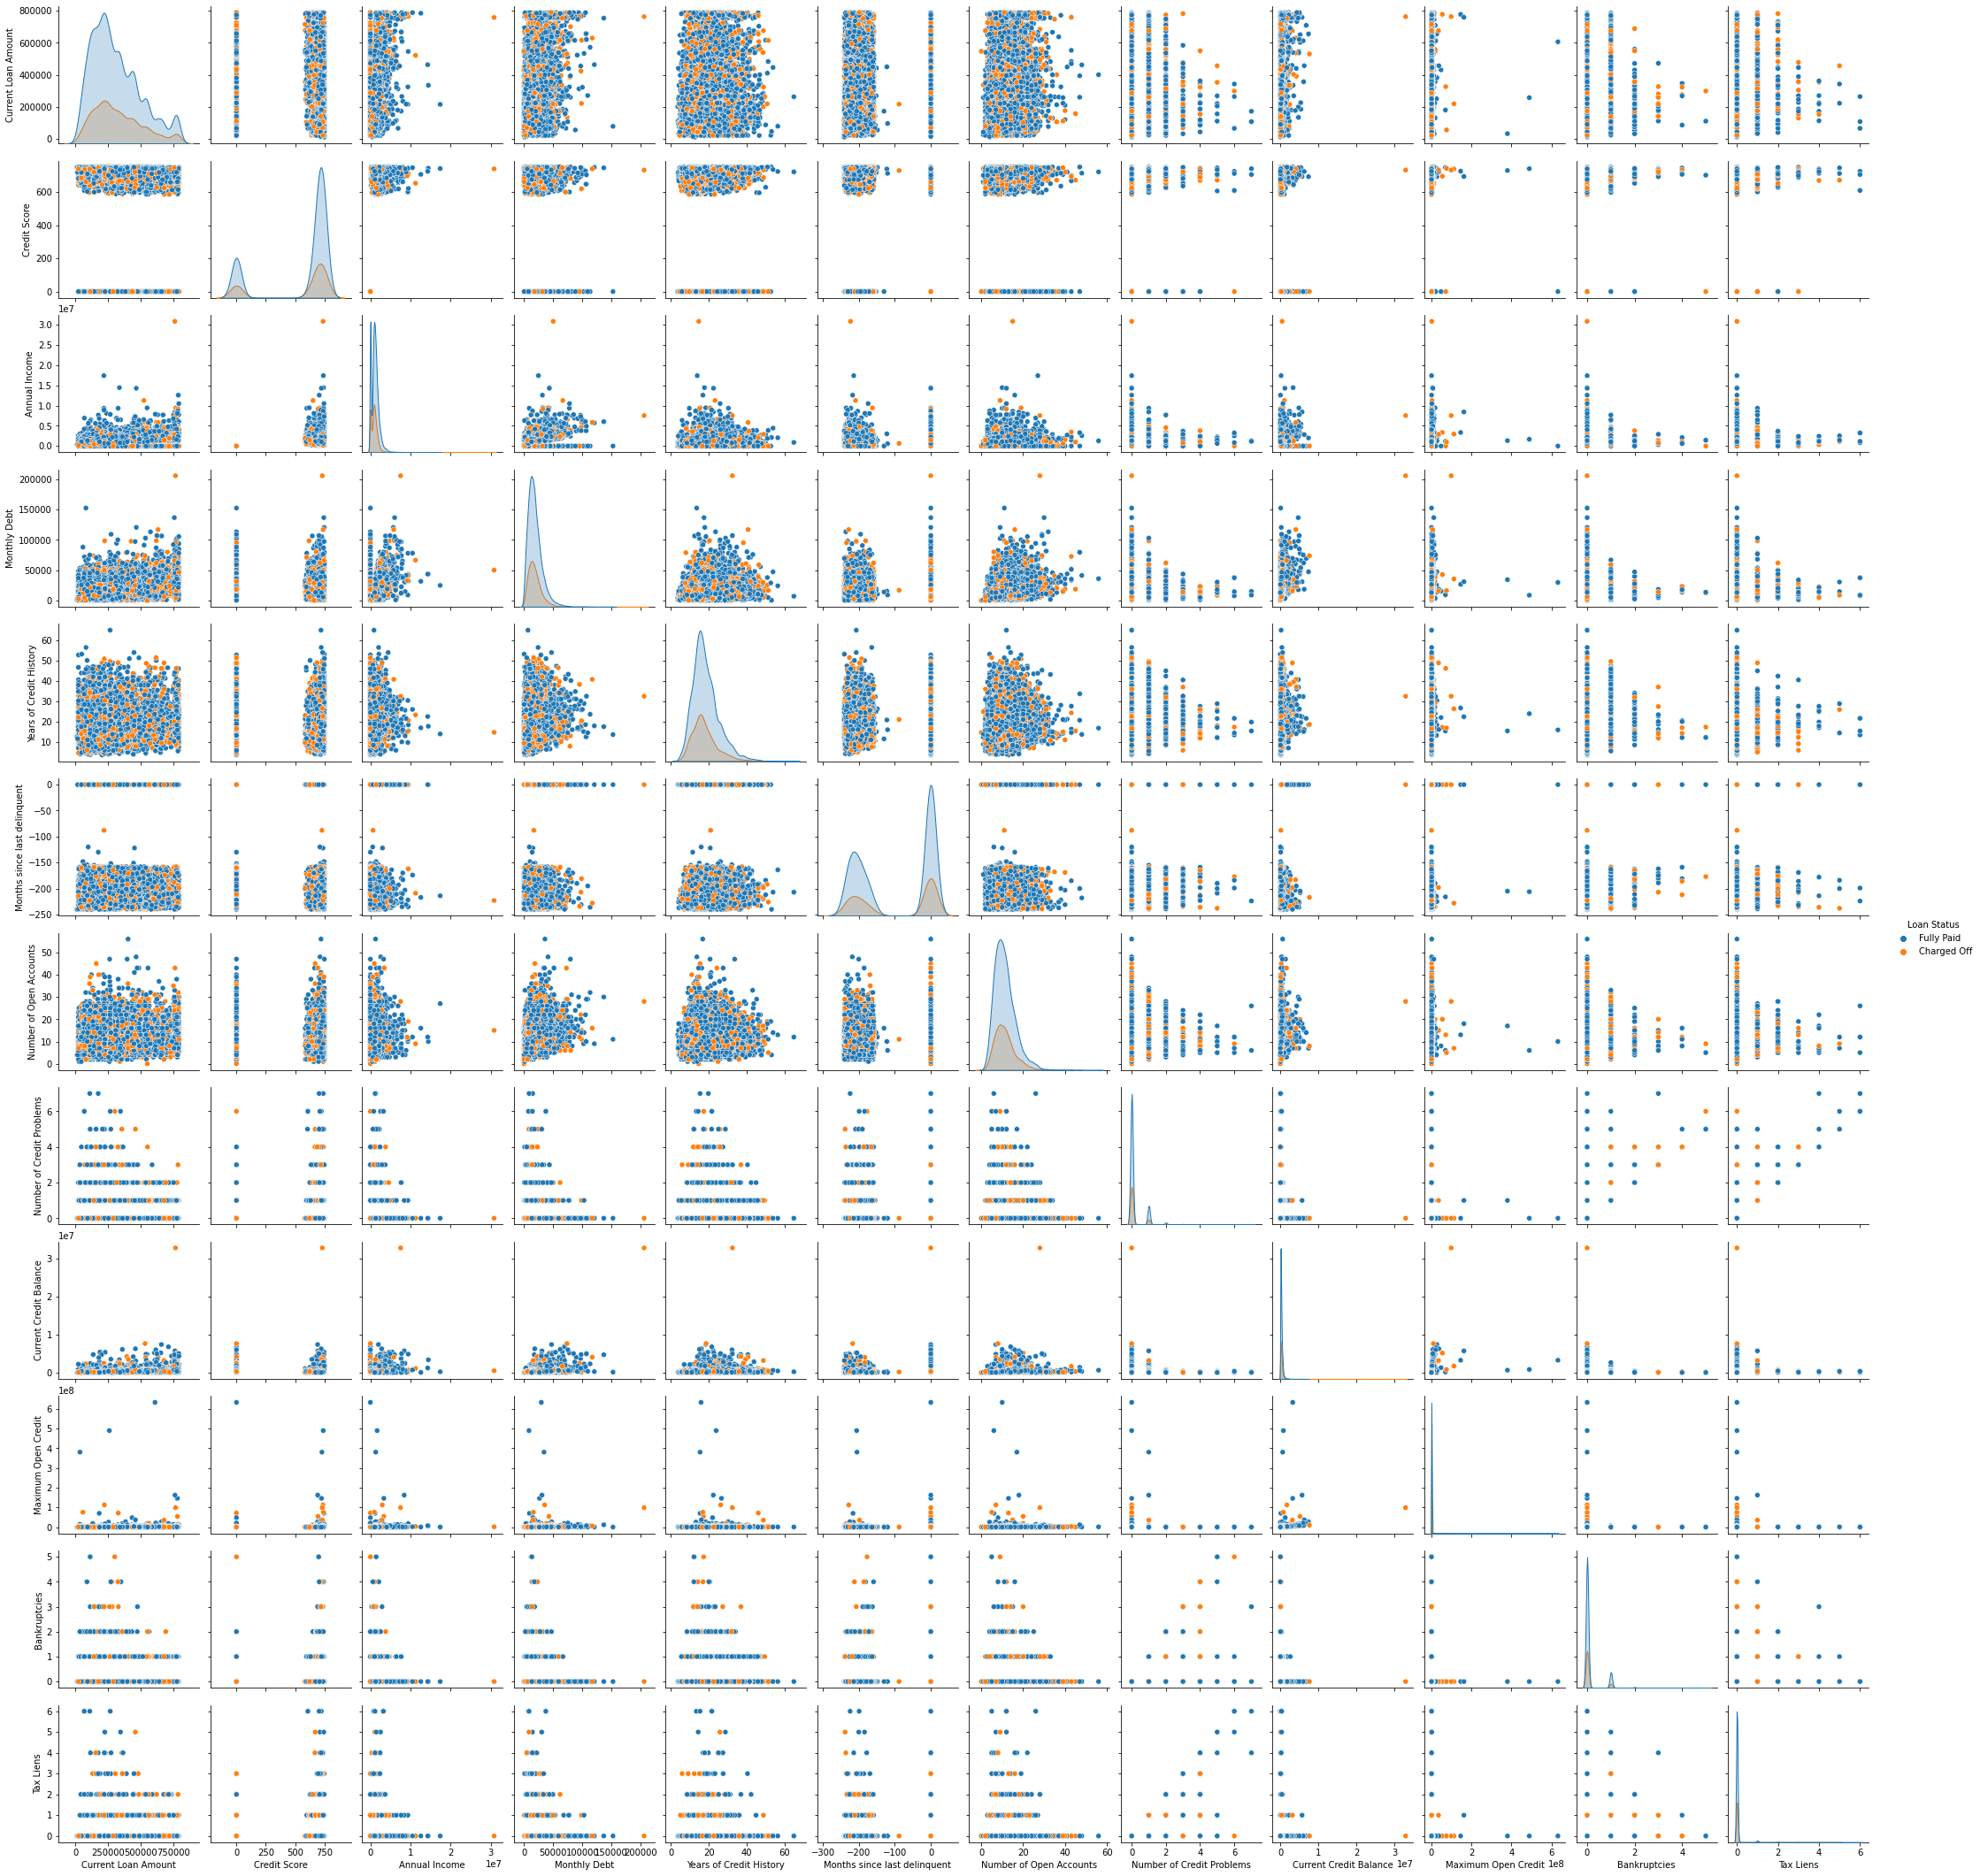

In [35]:
sns.pairplot(dataframe[Continuous], hue='Loan Status')

D:\WisenProgramFiles\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\WisenProgramFiles\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\WisenProgramFiles\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

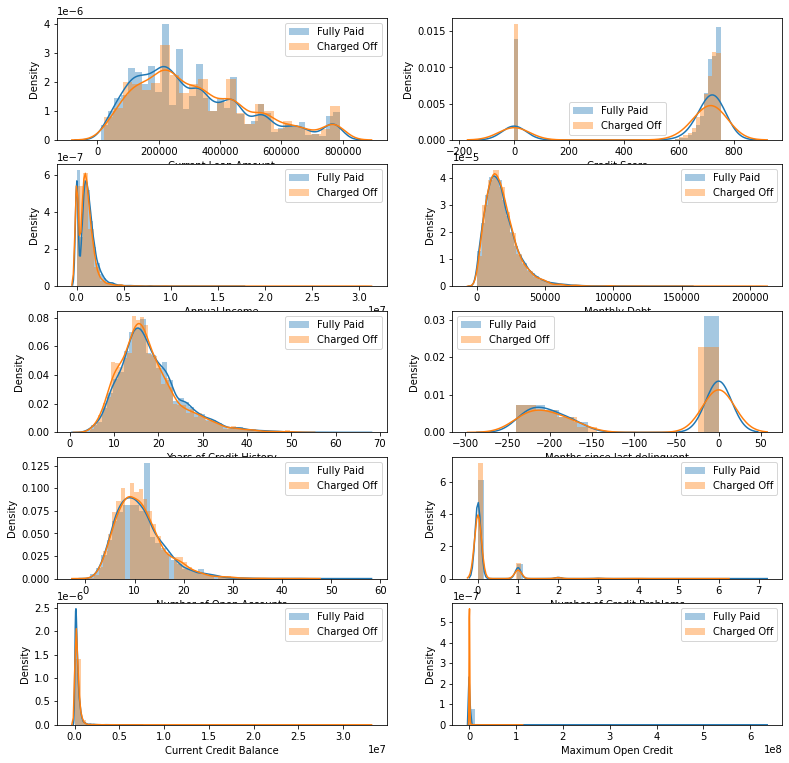

In [36]:
plt.figure(figsize=(13,13))
for i in range(1, 11):
    plt.subplot(5,2,i)
    sns.distplot(dataframe.loc[dataframe['Loan Status']=='Fully Paid', Continuous[i]], label='Fully Paid')
    sns.distplot(dataframe.loc[dataframe['Loan Status']=='Charged Off', Continuous[i]], label= 'Charged Off')
    plt.legend(loc = 'best')
plt.show()

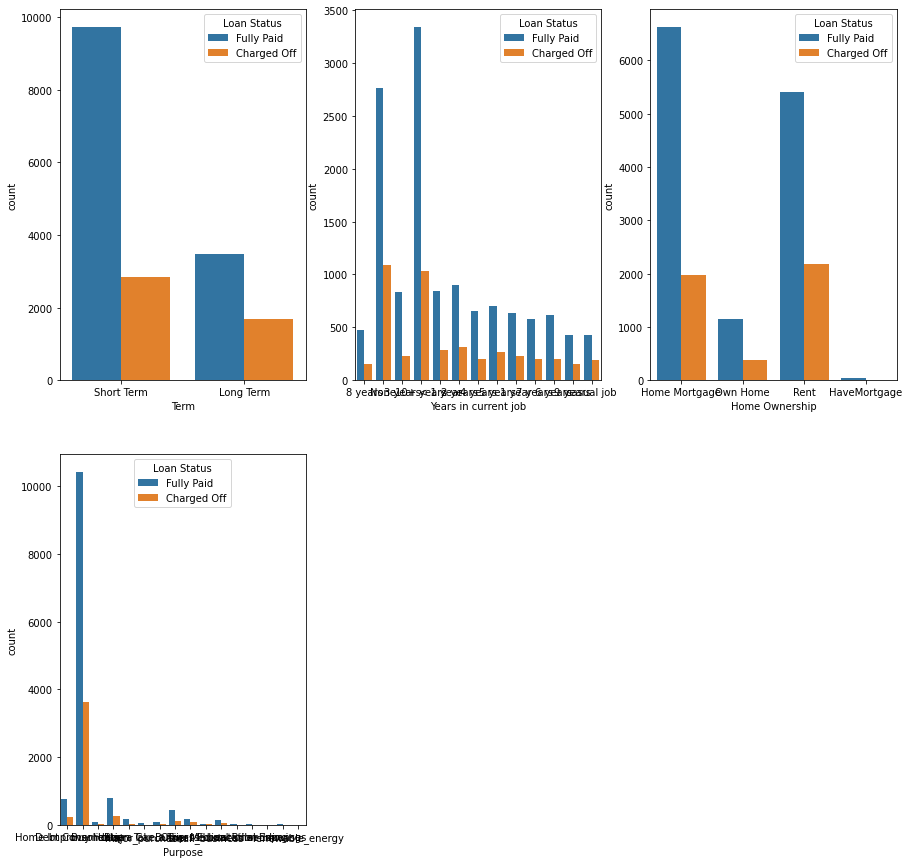

In [37]:
plt.figure(figsize=(15 ,15))
for i in range(1,5):
    plt.subplot(2,3,i)
    sns.countplot(x=Category[i], data =dataframe, hue='Loan Status')
plt.show()

In [38]:
Continuous.remove('Loan Status')
Category.remove('Loan Status')

In [39]:

scale = MinMaxScaler().fit(dataframe[Continuous])
scaled_dataframe = pd.DataFrame(scale.transform(dataframe[Continuous]), columns= Continuous, index= dataframe.index)

In [40]:
df_dummies = pd.get_dummies(dataframe[Category], drop_first= True)
df_dummies

,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
19996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
findataframe = pd.concat([scaled_dataframe, df_dummies], axis= 1)
findataframe

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.558164,0.944075,0.037858,0.025339,0.221498,1.000000,0.107143,0.142857,0.006940,0.000659,...,0,0,0,0,0,0,0,0,0,0
1,0.322793,0.000000,0.000000,0.161787,0.285016,0.033333,0.625000,0.000000,0.006995,0.001345,...,0,0,0,0,0,0,0,0,0,0
3,0.432503,0.960053,0.026167,0.042477,0.136808,1.000000,0.160714,0.000000,0.007796,0.000612,...,0,0,0,0,0,0,0,0,0,0
4,0.212094,0.000000,0.000000,0.100289,0.040717,1.000000,0.267857,0.000000,0.007709,0.000675,...,0,0,0,0,0,0,0,0,0,0
5,0.251153,0.970706,0.029082,0.079532,0.223127,1.000000,0.107143,0.000000,0.006549,0.000431,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.100093,0.936085,0.034937,0.073729,0.265472,0.112500,0.178571,0.000000,0.008294,0.000574,...,1,0,0,0,0,0,0,0,0,0
19996,0.855078,0.830892,0.047354,0.029626,0.527687,1.000000,0.035714,0.000000,0.009649,0.000926,...,0,0,0,0,0,0,0,0,0,0
19997,0.693158,0.898802,0.036774,0.064748,0.420195,0.108333,0.089286,0.000000,0.002361,0.000163,...,0,0,0,0,0,0,0,0,0,0
19998,0.102695,0.944075,0.043752,0.128390,0.120521,0.308333,0.250000,0.000000,0.002123,0.000539,...,0,0,0,0,0,0,0,0,0,0


In [42]:
temp = list(findataframe.columns)
temp.sort()
temp

['Annual Income',
 'Bankruptcies',
 'Credit Score',
 'Current Credit Balance',
 'Current Loan Amount',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Maximum Open Credit',
 'Monthly Debt',
 'Months since last delinquent',
 'Number of Credit Problems',
 'Number of Open Accounts',
 'Purpose_Buy House',
 'Purpose_Buy a Car',
 'Purpose_Debt Consolidation',
 'Purpose_Educational Expenses',
 'Purpose_Home Improvements',
 'Purpose_Medical Bills',
 'Purpose_Other',
 'Purpose_Take a Trip',
 'Purpose_major_purchase',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_renewable_energy',
 'Purpose_small_business',
 'Purpose_vacation',
 'Purpose_wedding',
 'Tax Liens',
 'Term_Short Term',
 'Years in current job_10+ years',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job_4 years',
 'Years in current job_5 years',
 'Years in current job_6 years',
 'Years in current job_7 years',
 'Years in current job_8 years',
 'Years in cu

In [43]:
loanlist = ['Term_Short Term',
            'Current Loan Amount',
            'Maximum Open Credit',
            'Number of Open Accounts',
            'Purpose_Buy House',
            'Purpose_Buy a Car',
            'Purpose_Debt Consolidation',
            'Purpose_Educational Expenses',
            'Purpose_Home Improvements',
            'Purpose_Medical Bills',
            'Purpose_Other',
            'Purpose_Take a Trip',
            'Purpose_major_purchase',
            
            'Purpose_other',
            
            'Purpose_small_business',
            'Purpose_vacation',
            'Purpose_wedding',]

creditlist = ['Credit Score',
              'Years of Credit History',
              'Months since last delinquent',
              'Number of Credit Problems',
              'Bankruptcies',
              'Tax Liens']

incomelist = ['Annual Income',
              'Current Credit Balance',
              'Years in current job_10+ years',
              'Years in current job_2 years',
              'Years in current job_3 years',
              'Years in current job_4 years',
              'Years in current job_5 years',
              'Years in current job_6 years',
              'Years in current job_7 years',
              'Years in current job_8 years',
              'Years in current job_9 years',
              'Years in current job_< 1 year',
              'Years in current job_None',
              'Years in current job_casual job',
              'Home Ownership_Home Mortgage',
              'Home Ownership_Own Home',
              'Home Ownership_Rent']

In [44]:
dataset_loan = findataframe[loanlist]
dataset_credit = findataframe[creditlist]
dataset_income = findataframe[incomelist]

target = dataframe['Loan Status']
target = target.replace('Fully Paid', 1)
target = target.replace('Charged Off', 0)


xtrain_loan, xtest_loan, ytrain, ytest = train_test_split(dataset_loan, target, test_size=0.2, stratify = target)

train_indexlist = list(xtrain_loan.index)
test_indexlist = list(xtest_loan.index)
xtrain_credit = dataset_credit.loc[train_indexlist]
xtest_credit = dataset_credit.loc[test_indexlist]
xtrain_income = dataset_income.loc[train_indexlist]
xtest_income = dataset_income.loc[test_indexlist]


In [45]:
log_loan = LogisticRegression().fit(xtrain_loan, ytrain)
log_credit = LogisticRegression().fit(xtrain_credit, ytrain)
log_income = LogisticRegression().fit(xtrain_income, ytrain)

In [46]:
print(log_loan.score(xtrain_loan, ytrain))
print(log_loan.score(xtest_loan, ytest))
print('-'*20)
print(log_credit.score(xtrain_credit, ytrain))
print(log_credit.score(xtest_credit, ytest))
print('-'*20)
print(log_income.score(xtrain_income, ytrain))
print(log_income.score(xtest_income, ytest))

0.7444726094916209
0.7445789918332864
--------------------
0.7440501337839741
0.7440157702055759
--------------------
0.7440501337839741
0.7440157702055759


In [47]:
tree_loan = DecisionTreeClassifier().fit(xtrain_loan, ytrain)
tree_credit = DecisionTreeClassifier().fit(xtrain_credit, ytrain)
tree_income = DecisionTreeClassifier().fit(xtrain_income, ytrain)

In [48]:
print(tree_loan.score(xtrain_loan, ytrain))
print(tree_loan.score(xtest_loan, ytest))
print('-'*20)
print(tree_credit.score(xtrain_credit, ytrain))
print(tree_credit.score(xtest_credit, ytest))
print('-'*20)
print(tree_income.score(xtrain_income, ytrain))
print(tree_income.score(xtest_income, ytest))

1.0
0.6398197690791326
--------------------
0.9543726235741445
0.6339059419881723
--------------------
0.9977467962258837
0.6144747958321599


In [49]:
rdf_loan = RandomForestClassifier(max_depth=10).fit(xtrain_loan, ytrain)
rdf_credit = RandomForestClassifier(max_depth=10).fit(xtrain_credit, ytrain)
rdf_income = RandomForestClassifier(max_depth=10).fit(xtrain_income, ytrain)

In [50]:
print(rdf_loan.score(xtrain_loan, ytrain))
print(rdf_loan.score(xtest_loan, ytest))
print('-'*20)
print(rdf_credit.score(xtrain_credit, ytrain))
print(rdf_credit.score(xtest_credit, ytest))
print('-'*20)
print(rdf_income.score(xtrain_income, ytrain))
print(rdf_income.score(xtest_income, ytest))

0.749190254893677
0.7442973810194311
--------------------
0.7510913955780876
0.7448606026471416
--------------------
0.7475707646810308
0.7437341593917206


In [51]:
knn_loan = KNNClassifier().fit(xtrain_loan, ytrain)
knn_credit = KNNClassifier().fit(xtrain_credit, ytrain)
knn_income = KNNClassifier().fit(xtrain_income, ytrain)

In [52]:
print(knn_loan.score(xtrain_loan, ytrain))
print(knn_loan.score(xtest_loan, ytest))
print('-'*20)
print(knn_credit.score(xtrain_credit, ytrain))
print(knn_credit.score(xtest_credit, ytest))
print('-'*20)
print(knn_income.score(xtrain_income, ytrain))
print(knn_income.score(xtest_income, ytest))

0.7762287001830728
0.6924809912700648
--------------------
0.7748908604421912
0.695015488594762
--------------------
0.7749612730601324
0.698394818361025


In [53]:
svc_loan = SVC().fit(xtrain_loan, ytrain)
svc_credit = SVC().fit(xtrain_credit, ytrain)
svc_income = SVC().fit(xtrain_income, ytrain)

In [54]:
print(svc_loan.score(xtrain_loan, ytrain))
print(svc_loan.score(xtest_loan, ytest))
print('-'*20)
print(svc_credit.score(xtrain_credit, ytrain))
print(svc_credit.score(xtest_credit, ytest))
print('-'*20)
print(svc_income.score(xtrain_income, ytrain))
print(svc_income.score(xtest_income, ytest))

0.7444726094916209
0.7445789918332864
--------------------
0.7440501337839741
0.7440157702055759
--------------------
0.7440501337839741
0.7440157702055759


In [55]:
lin_loan = LinearRegression().fit(xtrain_loan, ytrain)
lin_credit = LinearRegression().fit(xtrain_credit, ytrain)
lin_income = LinearRegression().fit(xtrain_income, ytrain)

In [56]:
print(lin_loan.score(xtrain_loan, ytrain))
print(lin_loan.score(xtest_loan, ytest))
print('-'*20)
print(lin_credit.score(xtrain_credit, ytrain))
print(lin_credit.score(xtest_credit, ytest))
print('-'*20)
print(lin_income.score(xtrain_income, ytrain))
print(lin_income.score(xtest_income, ytest))

0.7440501337839741
0.7440157702055759
--------------------
0.7440501337839741
0.7440157702055759
--------------------
0.7440501337839741
0.7440157702055759
